# Code Execution Tool Example

This notebook demonstrates how to use the code execution tool in an agent-based system. The code execution tool allows agents to dynamically execute Python code as part of their reasoning or problem-solving process.

## Setup

First, let's import the necessary dependencies:

In [22]:
import sys
import os

# Add the parent directory to path if needed
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import the required modules
from agentic.core.tools.code_execution import DynamicCodeExecutionTool
from agentic.core.agent import AgentCore, AgentConfig
from agentic.core.llm import LLMManager

from dotenv import load_dotenv
load_dotenv()

True

## Creating a Code Execution Tool

Let's create a code execution tool instance:

In [6]:
# Initialize the code execution tool
code_tool = DynamicCodeExecutionTool()

# View the tool's description
print(f"Tool name: {code_tool.name}")
print(f"Tool description: {code_tool.description}")

Tool name: execute_python
Tool description: Execute Python code dynamically and return the results


## Basic Code Execution Examples

Let's test the code execution tool with some simple examples:

In [9]:
# Example 1: Simple arithmetic
code_snippet = """
a = 5
b = 7
result = a * b
print(f'The product of {a} and {b} is {result}')
result
"""

# Execute the code
output = code_tool.execute(code_snippet)
print("Tool output:")
print(output.data)

Tool output:
{'stdout': 'The product of 5 and 7 is 35\n', 'stderr': '', 'return_value': None}


In [10]:
# Example 2: Working with data structures
code_snippet = """
# Create a list of numbers
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Filter out even numbers and square the rest
result = [x**2 for x in numbers if x % 2 != 0]

print(f"Original numbers: {numbers}")
print(f"Squared odd numbers: {result}")

# Return the final result
result
"""

output = code_tool.execute(code_snippet)
print("Tool output:")
print(output.data)

Tool output:
{'stdout': 'Original numbers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]\nSquared odd numbers: [1, 9, 25, 49, 81]\n', 'stderr': '', 'return_value': None}


## Advanced Examples

### Data Visualization

The code execution tool can also handle more complex operations like data visualization:

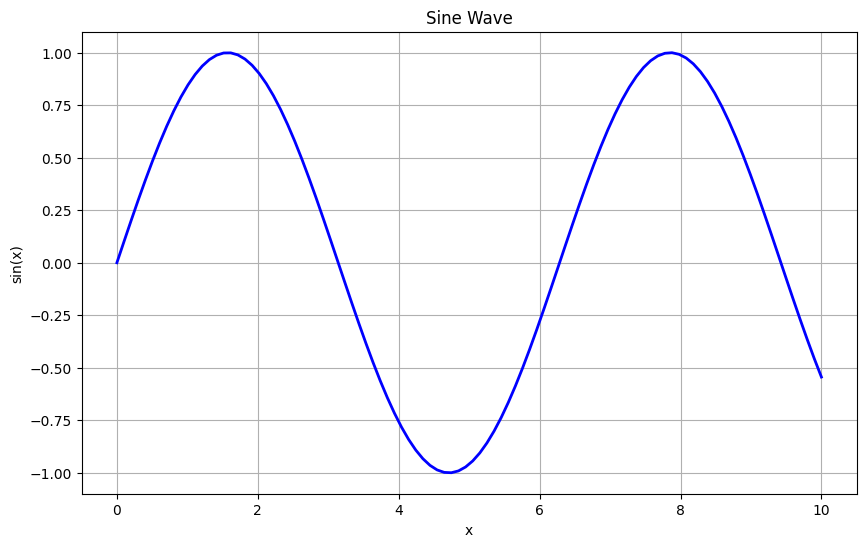

Tool output:


In [11]:
# Example 3: Data visualization
code_snippet = """
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2)
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)

# Show the plot
plt.show()

# Return information about the plot
'Plot of sin(x) created with matplotlib'
"""

output = code_tool.execute(code_snippet)
print("Tool output:")
print(output)

### Working with External Data

Let's see how the tool can be used to download and process external data:

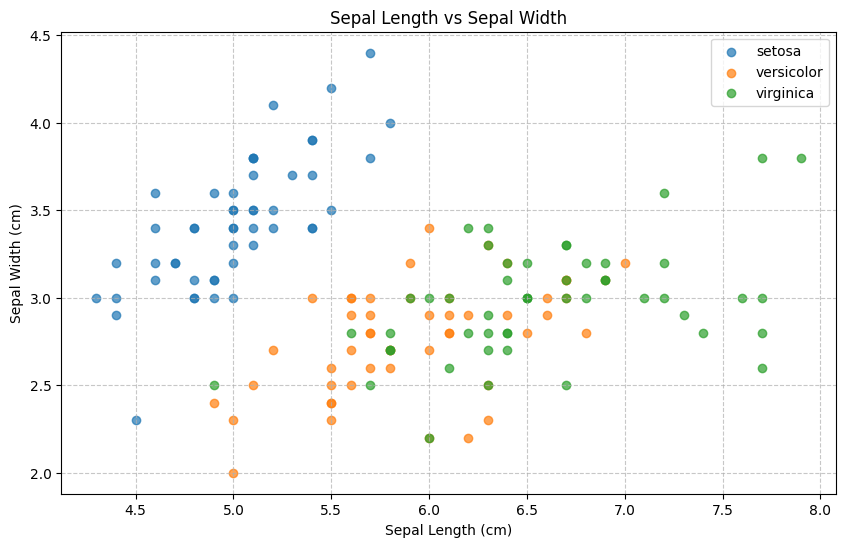

Tool output:
{'stdout': 'First 5 rows of the dataset:\n   sepal_length  sepal_width  petal_length  petal_width species\n0           5.1          3.5           1.4          0.2  setosa\n1           4.9          3.0           1.4          0.2  setosa\n2           4.7          3.2           1.3          0.2  setosa\n3           4.6          3.1           1.5          0.2  setosa\n4           5.0          3.6           1.4          0.2  setosa\nBasic statistics:\n       sepal_length  sepal_width  petal_length  petal_width\ncount    150.000000   150.000000    150.000000   150.000000\nmean       5.843333     3.057333      3.758000     1.199333\nstd        0.828066     0.435866      1.765298     0.762238\nmin        4.300000     2.000000      1.000000     0.100000\n25%        5.100000     2.800000      1.600000     0.300000\n50%        5.800000     3.000000      4.350000     1.300000\n75%        6.400000     3.300000      5.100000     1.800000\nmax        7.900000     4.400000      6.900000  

In [14]:
# Example 4: Download and process CSV data
code_snippet = """
import pandas as pd
import matplotlib.pyplot as plt

# URL to a sample dataset (iris dataset)
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

# Download and load the data
try:
    df = pd.read_csv(url)
    
    # Display the first few rows
    print("First 5 rows of the dataset:")
    print(df.head())
    
    # Basic statistics
    print("Basic statistics:")
    print(df.describe())
    
    # Create a scatter plot
    plt.figure(figsize=(10, 6))
    for species in df['species'].unique():
        subset = df[df['species'] == species]
        plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species, alpha=0.7)
    
    plt.title('Sepal Length vs Sepal Width')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    # Return a summary
    f"Successfully processed the Iris dataset with {len(df)} records and {len(df.columns)} features."
except Exception as e:
    f"Error processing data: {str(e)}"
"""

output = code_tool.execute(code_snippet)
print("Tool output:")
print(output.data)

## Integration with Agents

Now, let's see how the code execution tool can be integrated with an agent system:

2025-03-28 17:16:34,422 - agentic.llm - INFO - Initialized Azure OpenAI client with endpoint: https://richa-m8278ovo-eastus2.cognitiveservices.azure.com/
2025-03-28 17:16:34,423 - agentic.llm - INFO - Initialized tokenizer for model: gpt-4o
2025-03-28 17:16:34,424 - agentic.core - INFO - Tool registration for execute_python would happen here


Initializing agent...
Example of what the agent might execute:


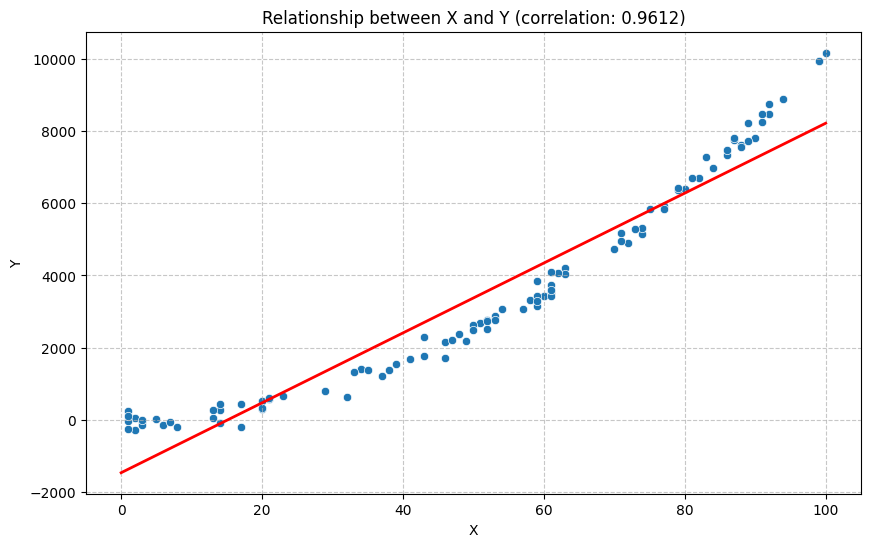


Result of executed code:
{'stdout': 'Correlation between x and y: 0.9612\n', 'stderr': 'c:\\Users\\RBui\\git\\ml\\kgpt_fusion\\.venv\\Lib\\site-packages\\sklearn\\utils\\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names\n  warnings.warn(\n', 'return_value': None, 'warnings': 'Code execution produced errors or warnings. Check stderr for details.'}


In [27]:
config = AgentConfig(
    planning_enabled=True,
    verbose=True,
    short_term_memory_capacity=15,
    long_term_memory_enabled=True,
    available_tools=["execute_python"]
)

# Initialize the agent core
print("Initializing agent...")
agent = AgentCore(config)

# Example task for the agent
prompt = """
I need to perform a quick data analysis. Please do the following:
1. Generate a random dataset with two columns: 'x' (random values from 0 to 100) and 'y' (x squared plus some noise)
2. Calculate the correlation between x and y
3. Create a scatter plot visualizing the relationship
4. Fit a linear regression model and show the best fit line
"""

# Run the agent (commented out for demonstration purposes)
# response = agent.run(prompt)
# print(response)

# Instead, let's show what the agent might execute
example_code = """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# Generate random data
n_samples = 100
x = np.random.randint(0, 101, n_samples)
noise = np.random.normal(0, 200, n_samples)
y = x**2 + noise

# Create a DataFrame
df = pd.DataFrame({
    'x': x,
    'y': y
})

# Calculate correlation
correlation = df['x'].corr(df['y'])
print(f"Correlation between x and y: {correlation:.4f}")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df)

# Fit a linear regression model
model = LinearRegression()
model.fit(df[['x']], df['y'])

# Add the regression line
x_range = np.linspace(0, 100, 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, 'r-', linewidth=2)

# Add labels and title
plt.title(f'Relationship between X and Y (correlation: {correlation:.4f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Return a summary of findings
f"Analysis complete. Found a correlation of {correlation:.4f} between x and y. Linear model coefficients: {model.coef_[0]:.4f}"
"""

print("Example of what the agent might execute:")
output = code_tool.execute(example_code)
print("\nResult of executed code:")
print(output.data)

## Error Handling and Safety

Let's demonstrate how the code execution tool handles errors and implements safety measures:

In [ ]:
# Example 5: Error handling
code_with_error = """
# This code contains a deliberate error
try:
    # Division by zero error
    result = 10 / 0
    print(f"Result: {result}")
except Exception as e:
    print(f"Caught an error: {type(e).__name__}: {str(e)}")
    "Error handled gracefully"
"""

output = code_tool.run(code_with_error)
print("Tool output for code with handled error:")
print(output)

# Example with unhandled error
code_with_unhandled_error = """
# This will raise an exception
result = 10 / 0
"""

try:
    output = code_tool.run(code_with_unhandled_error)
    print("\nTool output for unhandled error:")
    print(output)
except Exception as e:
    print(f"\nException caught at notebook level: {type(e).__name__}: {str(e)}")

## Restricted Operations

The code execution tool typically has restrictions on what operations can be performed for security reasons:

In [ ]:
# Example 6: File system operations (may be restricted)
file_system_code = """
import os

# List current directory contents
try:
    print("Current directory contents:")
    files = os.listdir('.')
    for file in files[:5]:  # Show at most 5 files
        print(f"- {file}")
    
    # Try to perform a write operation (might be restricted)
    try:
        with open('test_file.txt', 'w') as f:
            f.write('This is a test')
        print("Successfully wrote to file")
    except Exception as e:
        print(f"File write operation error: {type(e).__name__}: {str(e)}")
        
    "File operations demonstration complete"
except Exception as e:
    f"Error in file operations: {type(e).__name__}: {str(e)}"
"""

output = code_tool.run(file_system_code)
print("Tool output for file system operations:")
print(output)

## Conclusion

The Code Execution Tool provides a powerful way to dynamically run Python code within an agent-based system. This enables:

1. **Data Analysis**: Agents can perform calculations and analyze data on demand
2. **Visualization**: Generate charts and visual representations
3. **External Data Processing**: Download, process, and analyze external datasets
4. **Dynamic Problem Solving**: Execute complex algorithms based on user requirements

When implementing the Code Execution Tool in production systems, be sure to consider:
- Security implications and setting appropriate restrictions
- Resource usage limits (memory, CPU time)
- Error handling and recovery strategies
- Proper isolation of execution environments